In [8]:
import serial
import time 
import matplotlib.pyplot as plt

class OdorSensorController(object):
    """
    A class to control the odor sensor using the Arduino Interface
    """

    def __init__(self, serial_port="COM4", baud_rate=115200):
        """
        Initialize the OdorSensorController class.
        """
        self.serial_port = serial_port
        self.baud_rate = baud_rate
        self.arduino_interface = None

    def init(self):
        """
        Initialize the Arduino interface.
        """
        self.arduino_interface = serial.Serial(self.serial_port, self.baud_rate)
        time.sleep(1)
        print("Arduino interface initialised")

    def __enter__(self):
        """|
        Enter the context manager.
        """
        self.init()
        return self

    def close(self):
        """
        Close the Arduino interface.
        """
        self.arduino_interface.close()

    def __exit__(self, exc_type, exc_value, traceback):
        """
        Exit the context manager.
        """
        self.close()

    def read_sensor(self):
        """
        Read the sensor.
        """
        value = self.arduino_interface.readline().decode("utf-8")
        if value == "":
            return None
        value = int(value.rstrip('\r\n'))
        return value


In [12]:
with OdorSensorController() as sensor:
    values = []
    for i in range(100):
        value = sensor.read_sensor()
        values.append(value)
        time.sleep(0.1)

Arduino interface initialised


In [1]:
# Importing Libraries
import serial
import time
arduino = serial.Serial(port='COM4', baudrate=115200, timeout=.1)
def write_read(x):
    arduino.write(bytes(x, 'utf-8'))
    time.sleep(0.05)
    data = arduino.readline()
    return data
while True:
    num = input("Enter a number: ") # Taking input from user
    value = write_read(num)
    print(value) # printing the value

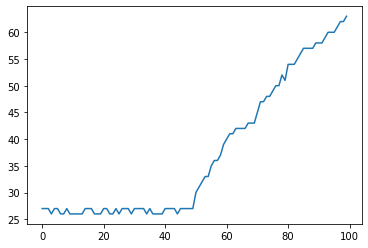

In [14]:
plt.plot(values)